# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Reading the Dataset

In [2]:
df = pd.read_csv('customer_purchase_data.csv')

In [3]:
df.head()

,Age,Gender,Annual Income,Number Of Purchases,Product Category,Time Spent On Website,Loyalty Program,Discounts Availed,Purchase Status
0,40,1,66120.26794,8.0,0,30.568601,0,5,1
1,20,1,23579.77358,4.0,2,38.240097,0,5,0
2,27,1,127821.30640,11.0,2,31.633212,1,0,1
3,24,1,137798.62310,19.0,3,46.167059,0,4,1
4,31,1,99300.96422,19.0,1,19.823592,0,0,1


In [4]:
df.tail()

,Age,Gender,Annual Income,Number Of Purchases,Product Category,Time Spent On Website,Loyalty Program,Discounts Availed,Purchase Status
1495,39,1,65048.14183,13.0,0,34.590743,0,5,1
1496,67,1,28775.33107,18.0,2,17.625707,0,1,1
1497,40,1,57363.24754,7.0,4,12.206033,0,0,0
1498,63,0,134021.77550,16.0,2,37.311634,1,0,1
1499,50,0,52625.66597,13.0,0,25.348017,1,4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1500 non-null   int64  
 1   Gender                 1500 non-null   int64  
 2   Annual Income          1500 non-null   float64
 3   Number Of Purchases    1500 non-null   float64
 4   Product Category       1500 non-null   int64  
 5   Time Spent On Website  1500 non-null   float64
 6   Loyalty Program        1500 non-null   int64  
 7   Discounts Availed      1500 non-null   int64  
 8   Purchase Status        1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [6]:
df.describe()

,Age,Gender,Annual Income,Number Of Purchases,Product Category,Time Spent On Website,Loyalty Program,Discounts Availed,Purchase Status
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164339,35.582745,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,974.659196,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512520,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581475,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772900,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176500,37758.117470,4.000000,59.991105,1.000000,5.000000,1.00000


In [7]:
df.size

13500

In [8]:
df.shape

(1500, 9)

In [9]:
df.columns

Index(['Age', 'Gender', 'Annual Income', 'Number Of Purchases',
       'Product Category', 'Time Spent On Website', 'Loyalty Program',
       'Discounts Availed', 'Purchase Status'],
      dtype='object')

In [10]:
df.sum()

Age                      6.644800e+04
Gender                   7.570000e+02
Annual Income            1.263737e+08
Number Of Purchases      5.337412e+04
Product Category         3.019000e+03
Time Spent On Website    4.570356e+04
Loyalty Program          4.900000e+02
Discounts Availed        3.833000e+03
Purchase Status          6.480000e+02
dtype: float64

In [11]:
df.isnull()

,Age,Gender,Annual Income,Number Of Purchases,Product Category,Time Spent On Website,Loyalty Program,Discounts Availed,Purchase Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Age                      0
Gender                   0
Annual Income            0
Number Of Purchases      0
Product Category         0
Time Spent On Website    0
Loyalty Program          0
Discounts Availed        0
Purchase Status          0
dtype: int64

# Correlation Matrix

In [13]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [14]:
numerical_columns = ['Age', 'Annual Income', 'Number Of Purchases', 'Time Spent On Website', 'Discounts Availed']

In [15]:
correlation_matrix = df[numerical_columns].corr()

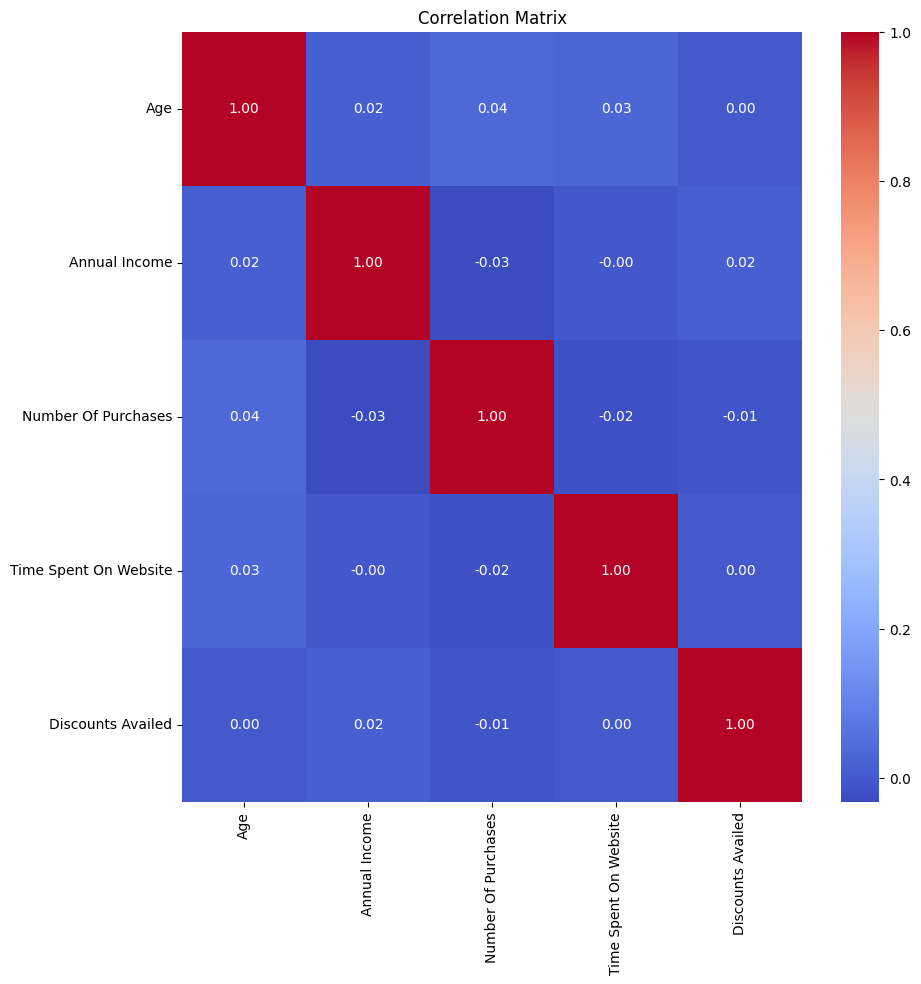

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Confusion Matrix

In [17]:
x = df.drop(columns=['Purchase Status'])
y = df['Purchase Status']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [19]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = clf.predict(x_test)

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [22]:
conf_matrix, report

(array([[252,   5],
        [ 20, 173]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.93      0.98      0.95       257\n           1       0.97      0.90      0.93       193\n\n    accuracy                           0.94       450\n   macro avg       0.95      0.94      0.94       450\nweighted avg       0.95      0.94      0.94       450\n')

# Data Visualization

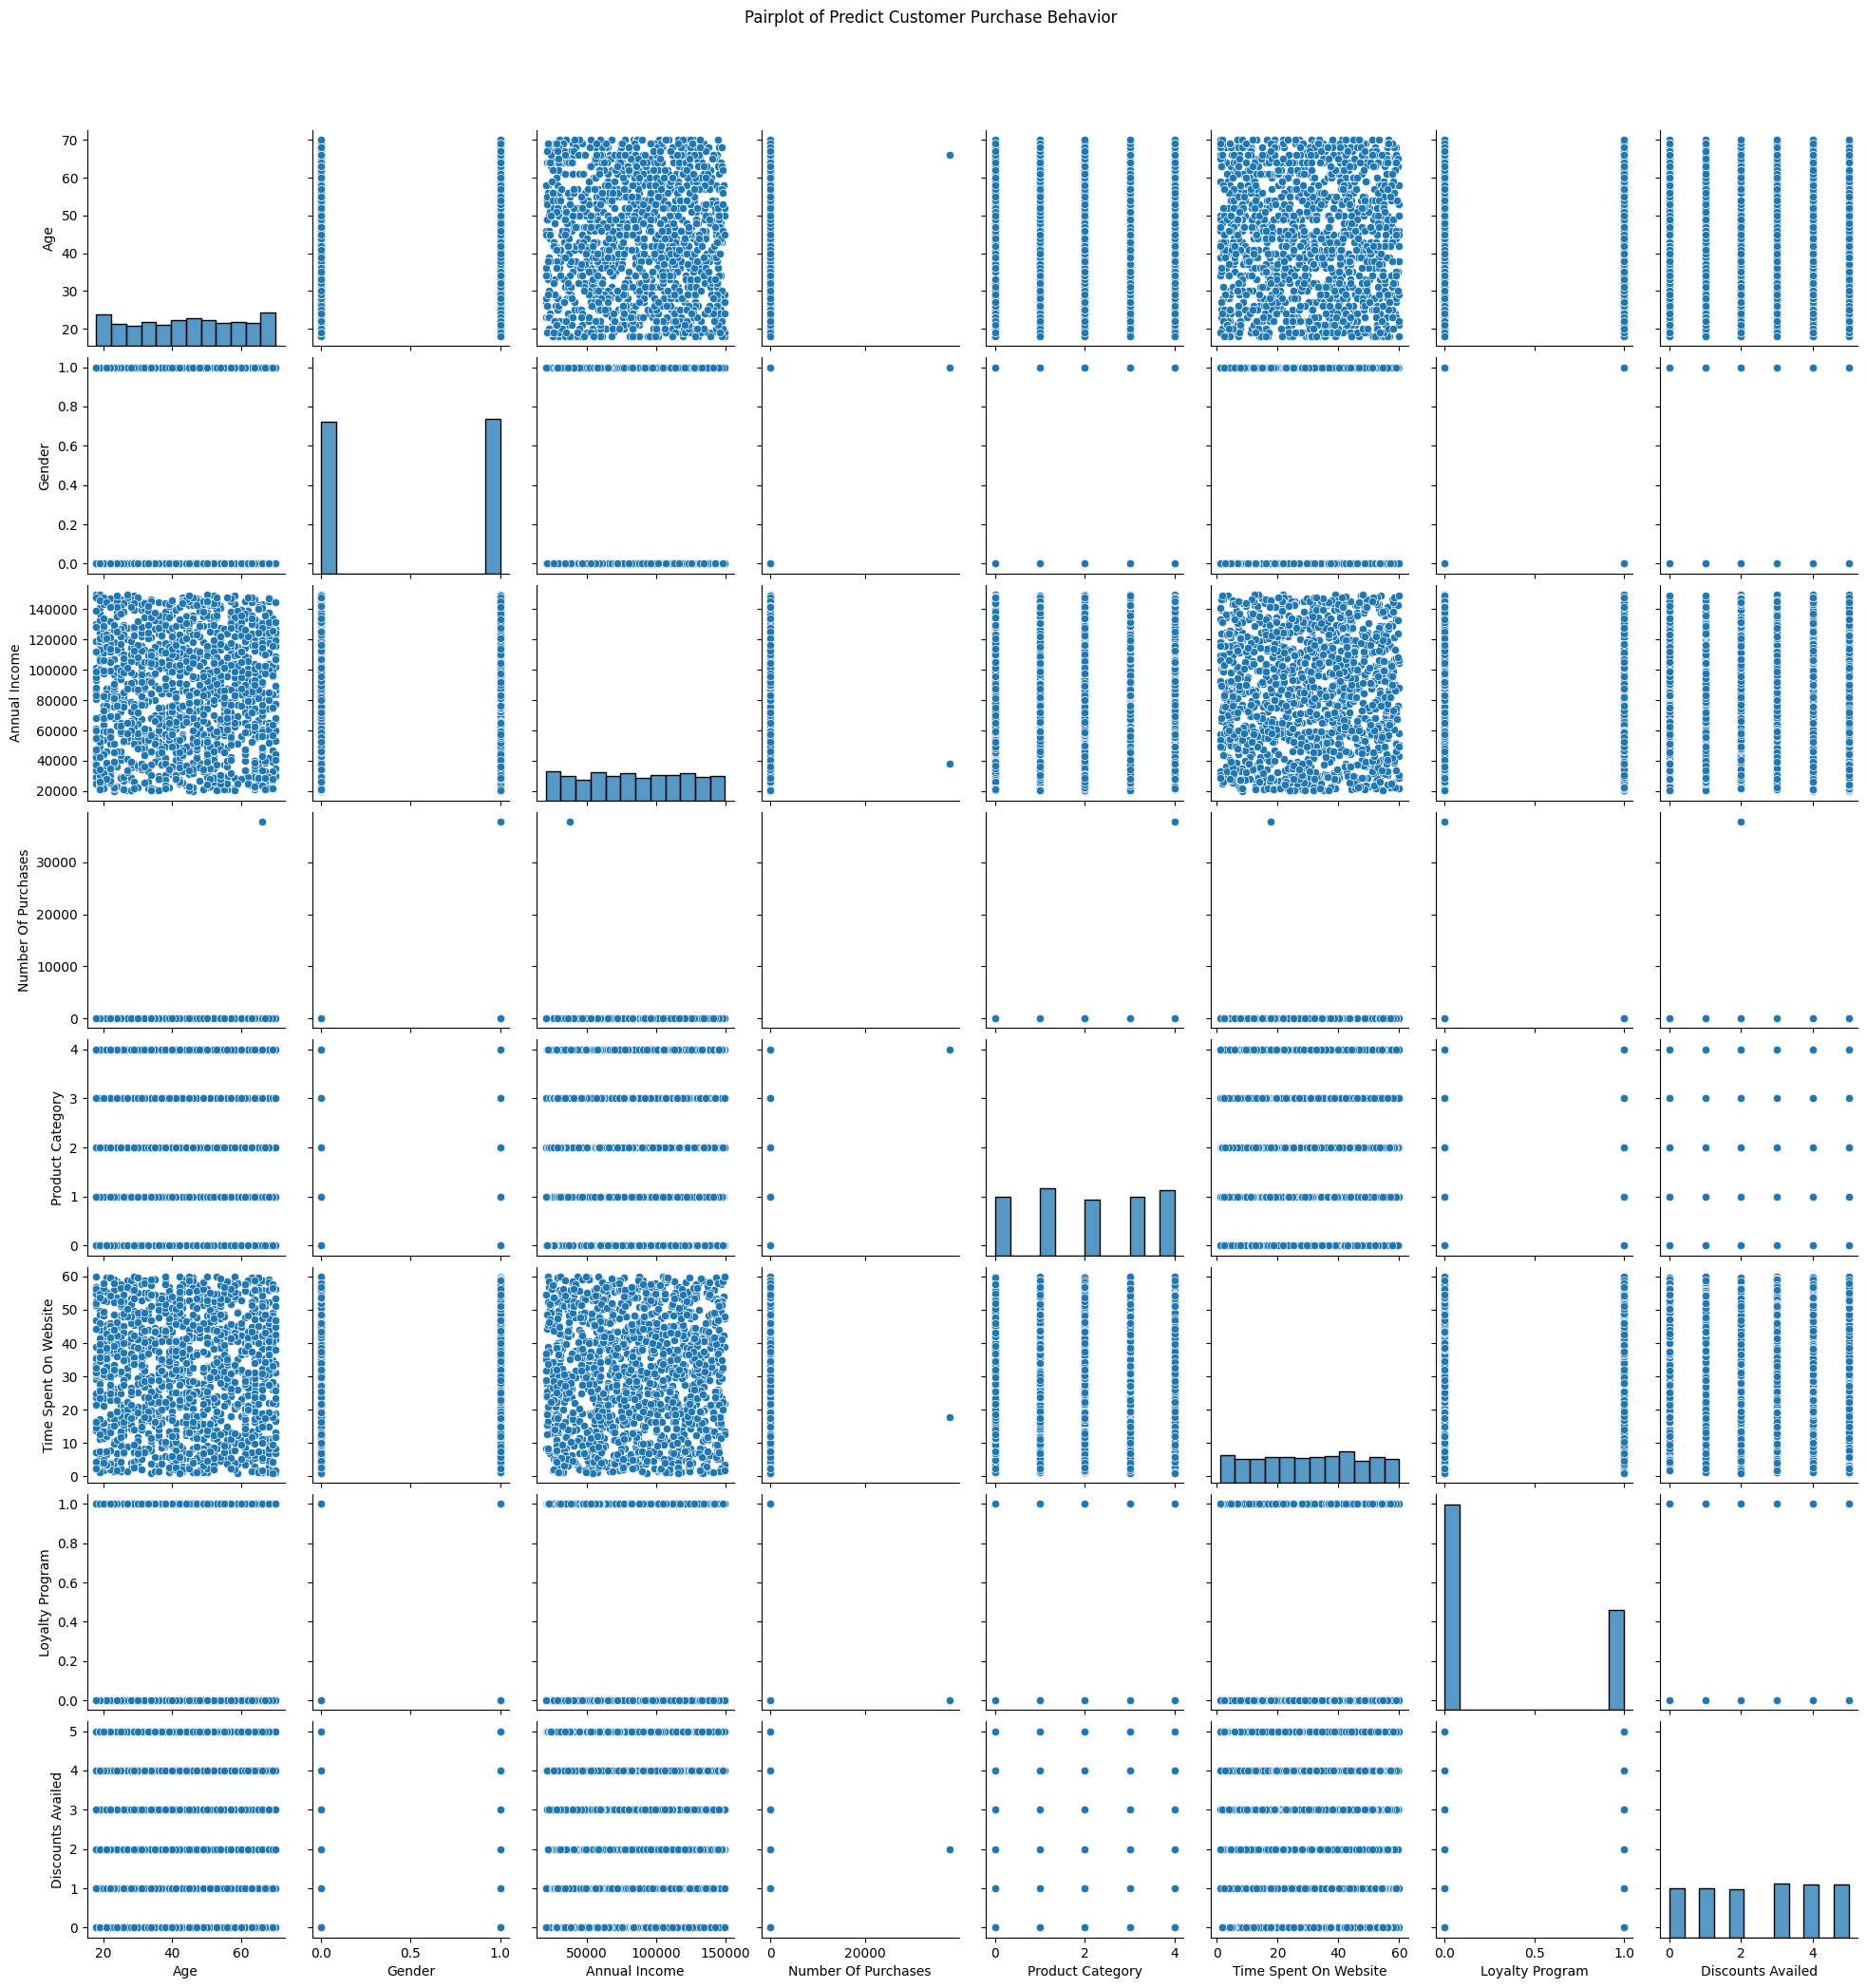

In [23]:
other_attributes = ['Age','Gender','Annual Income','Number Of Purchases','Product Category','Time Spent On Website','Loyalty Program','Discounts Availed']
pairplot = sns.pairplot(df[other_attributes], palette='viridis')
pairplot.fig.suptitle('Pairplot of Predict Customer Purchase Behavior ', y=1.05)
plt.show()

Text(0.5, 1.05, 'Pairplot of Predict Customer Purchase Behavior ')

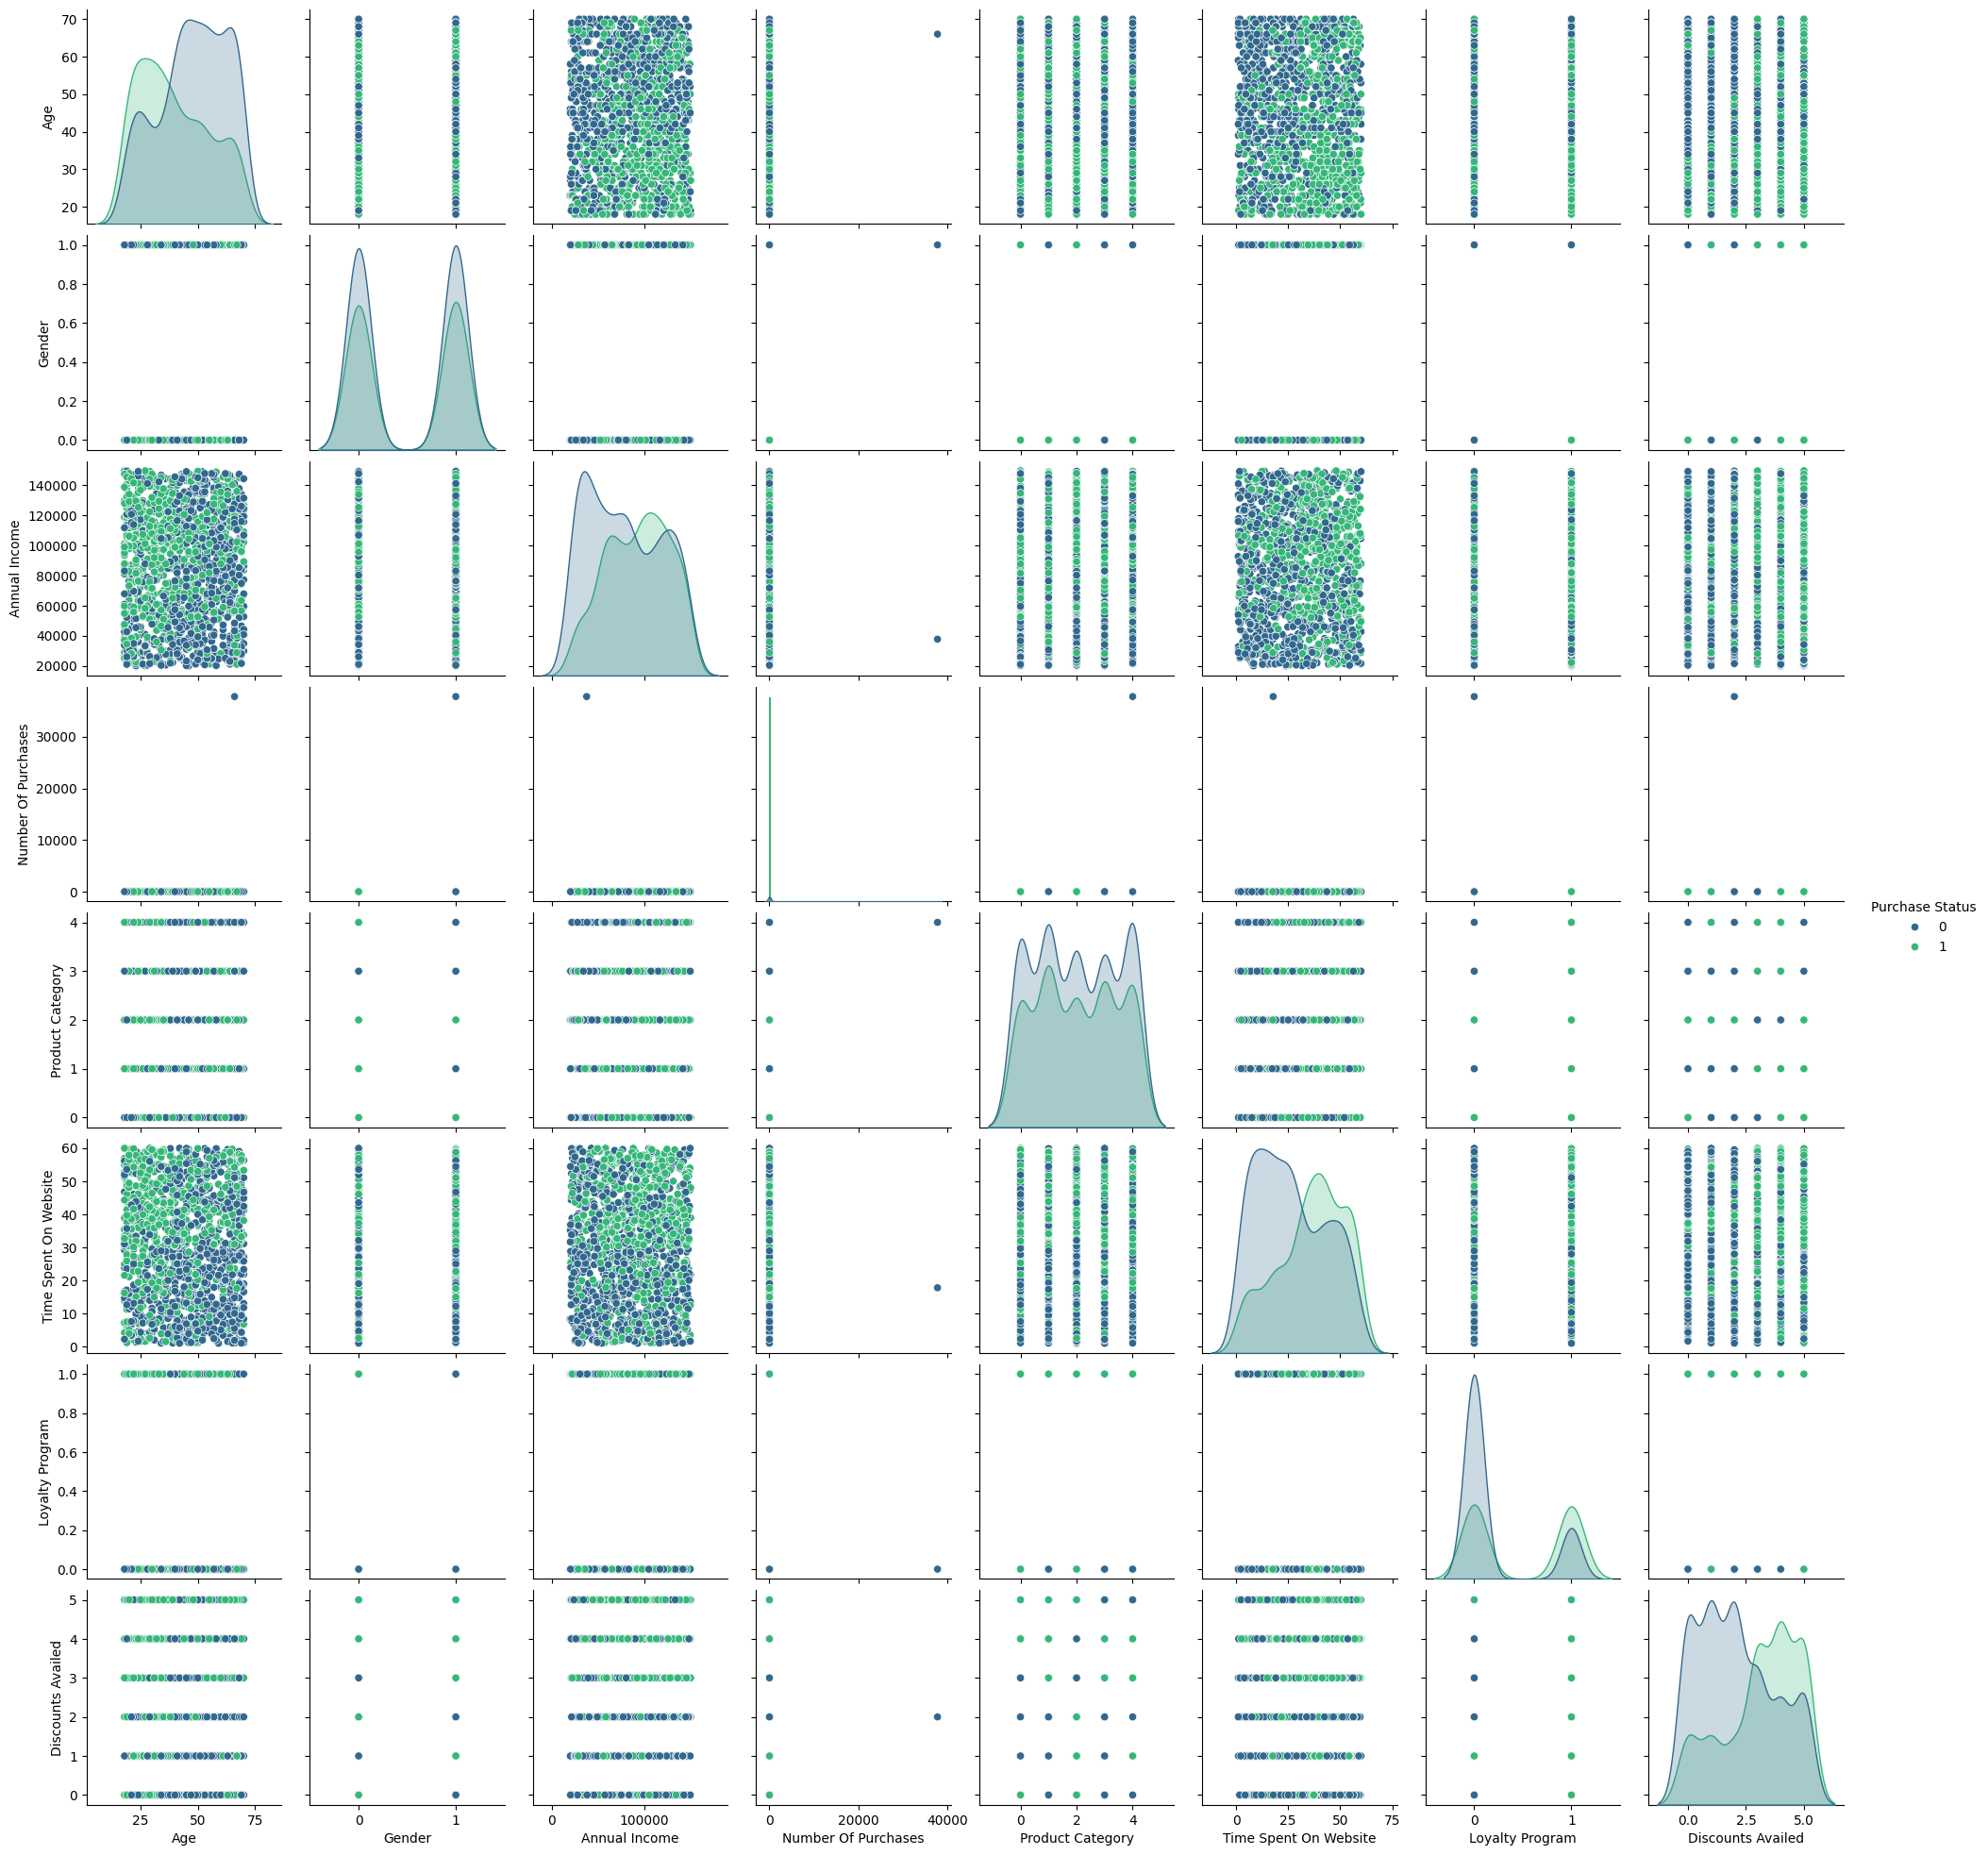

In [24]:
sns.pairplot(df, hue='Purchase Status', palette='viridis')
pairplot.fig.suptitle('Pairplot of Predict Customer Purchase Behavior ', y=1.05)

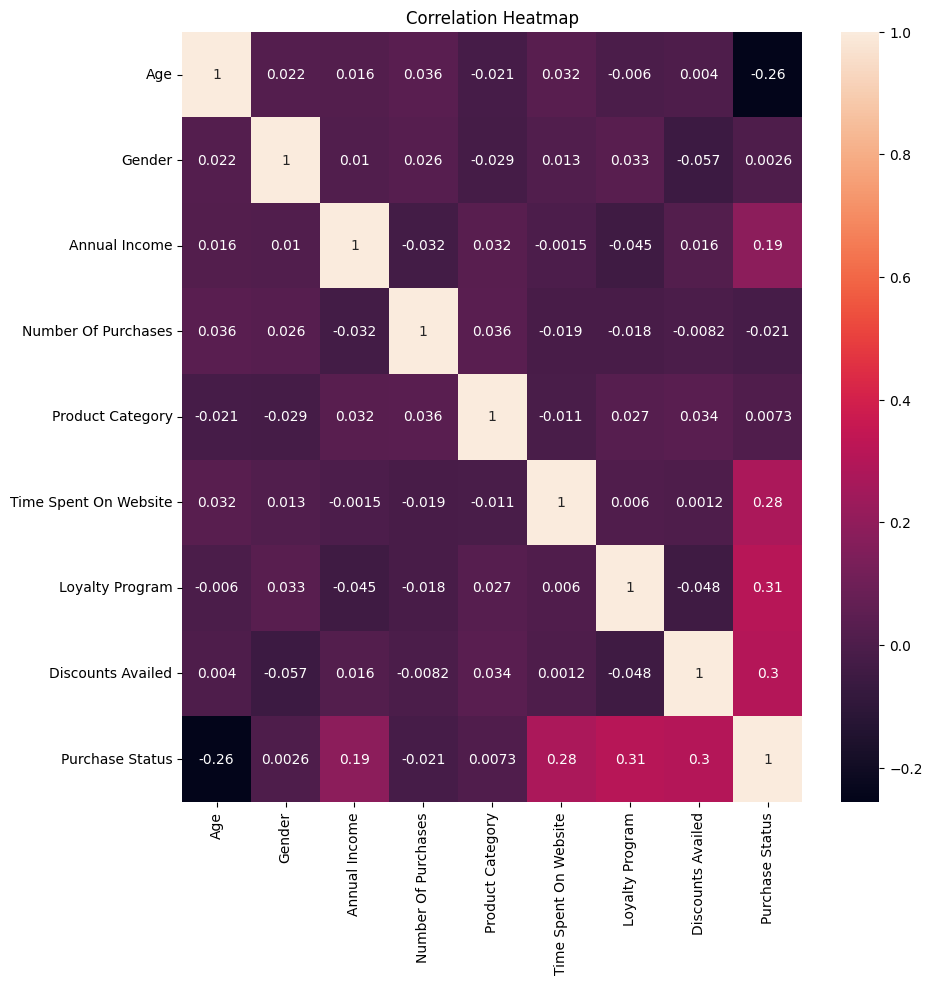

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
features = df.columns[:-1].values
label = [df.columns[-1]]

print ("The Features are:", features)
print ("The Label is:", label)

The Features are: ['Age' 'Gender' 'Annual Income' 'Number Of Purchases' 'Product Category'
 'Time Spent On Website' 'Loyalty Program' 'Discounts Availed']
The Label is: ['Purchase Status']


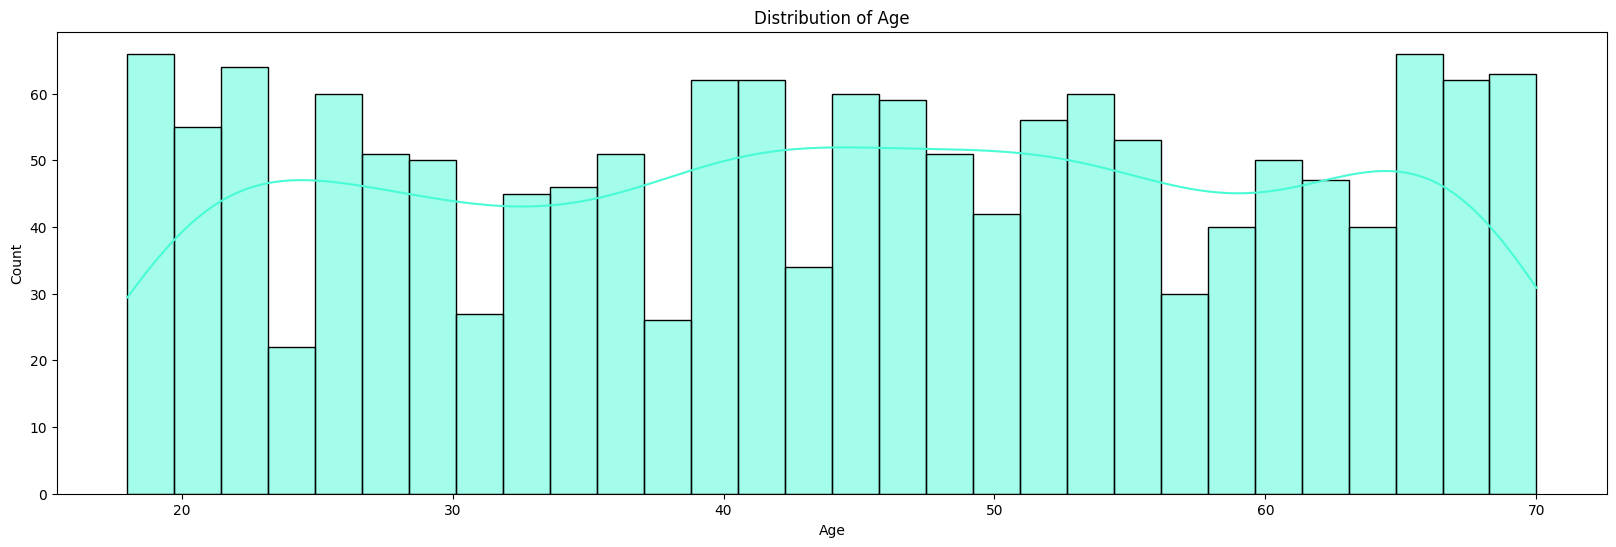

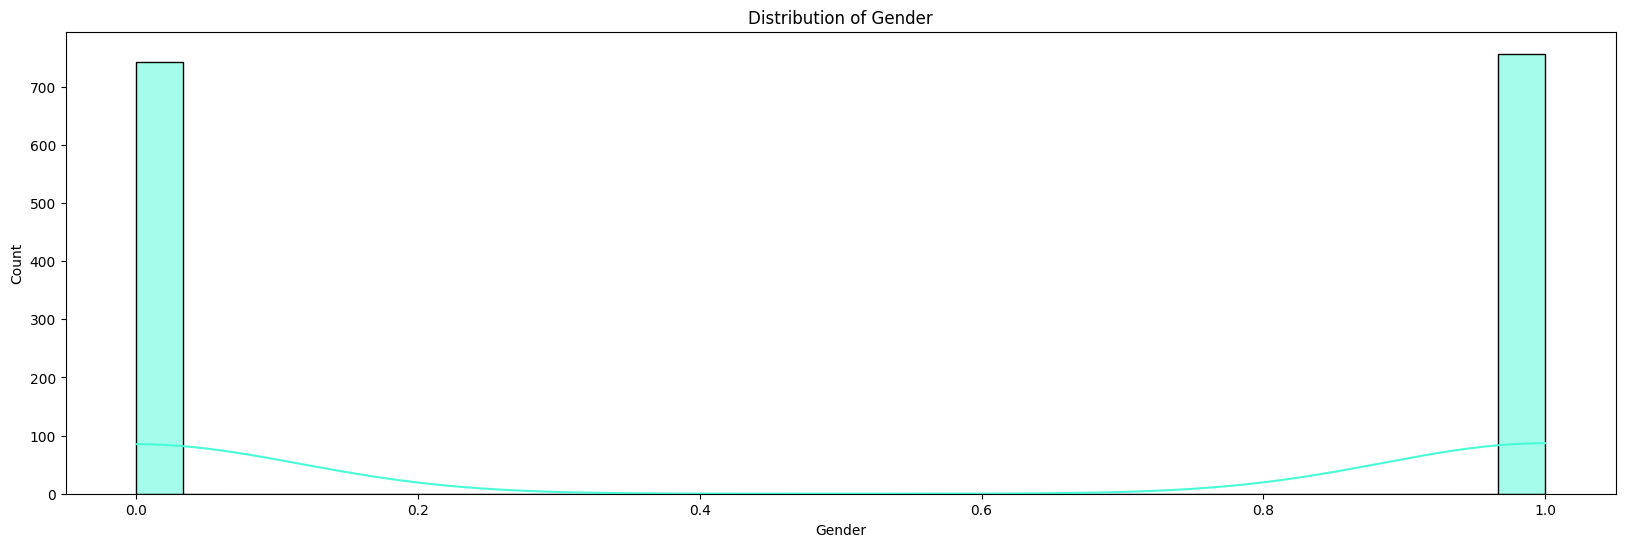

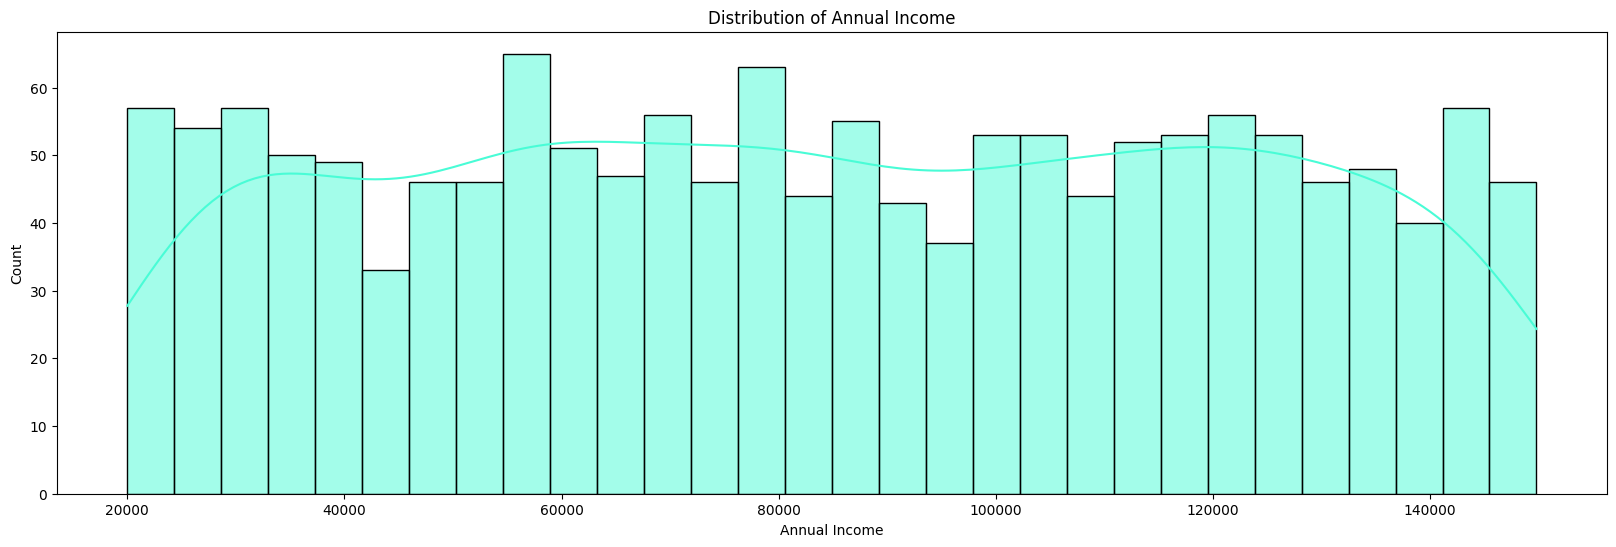

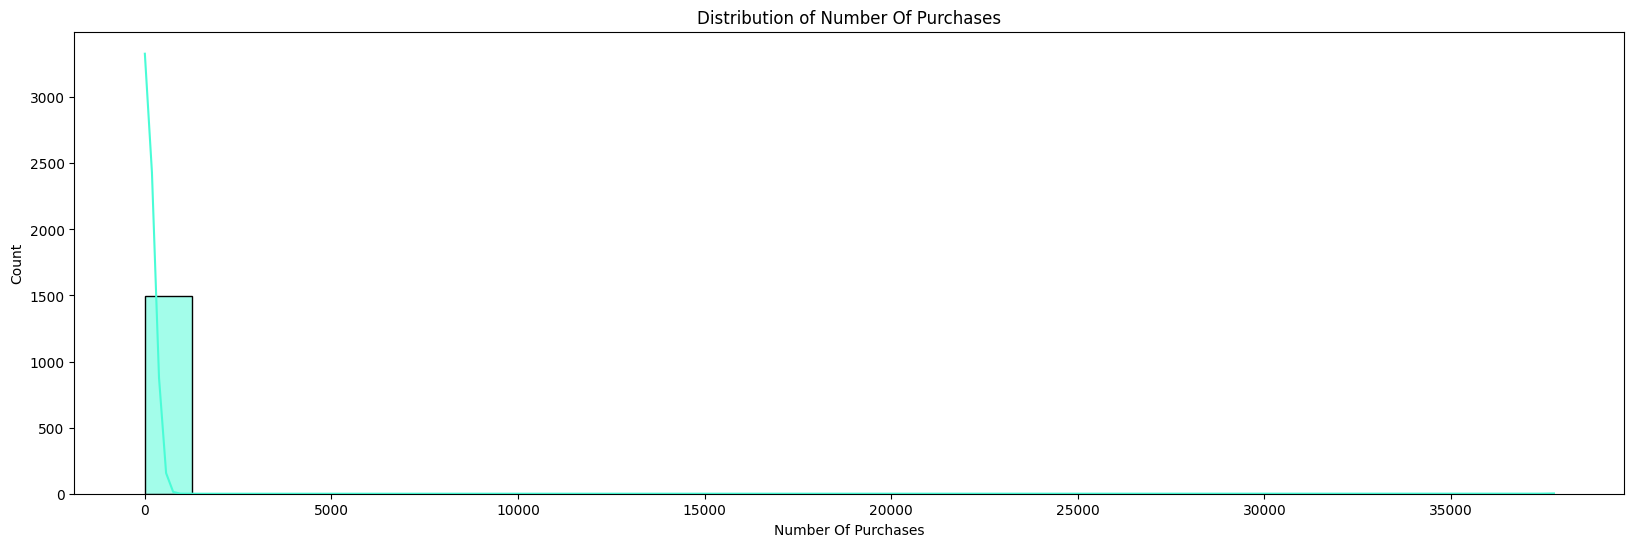

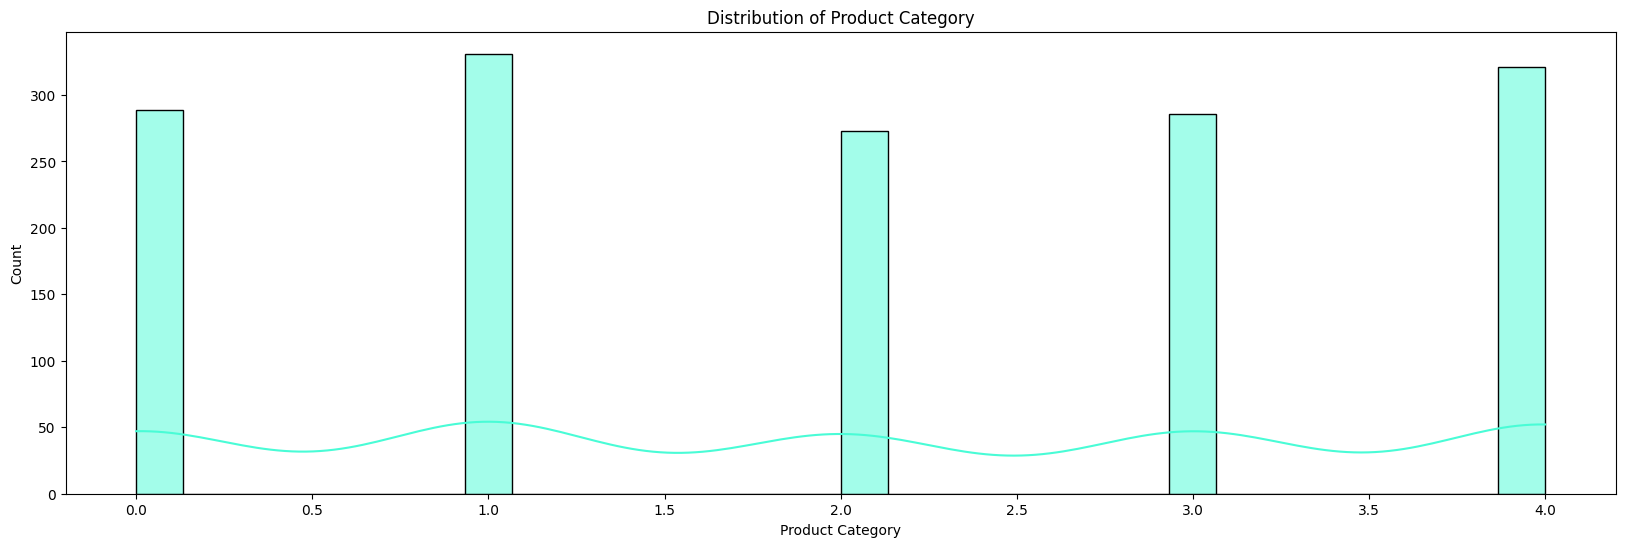

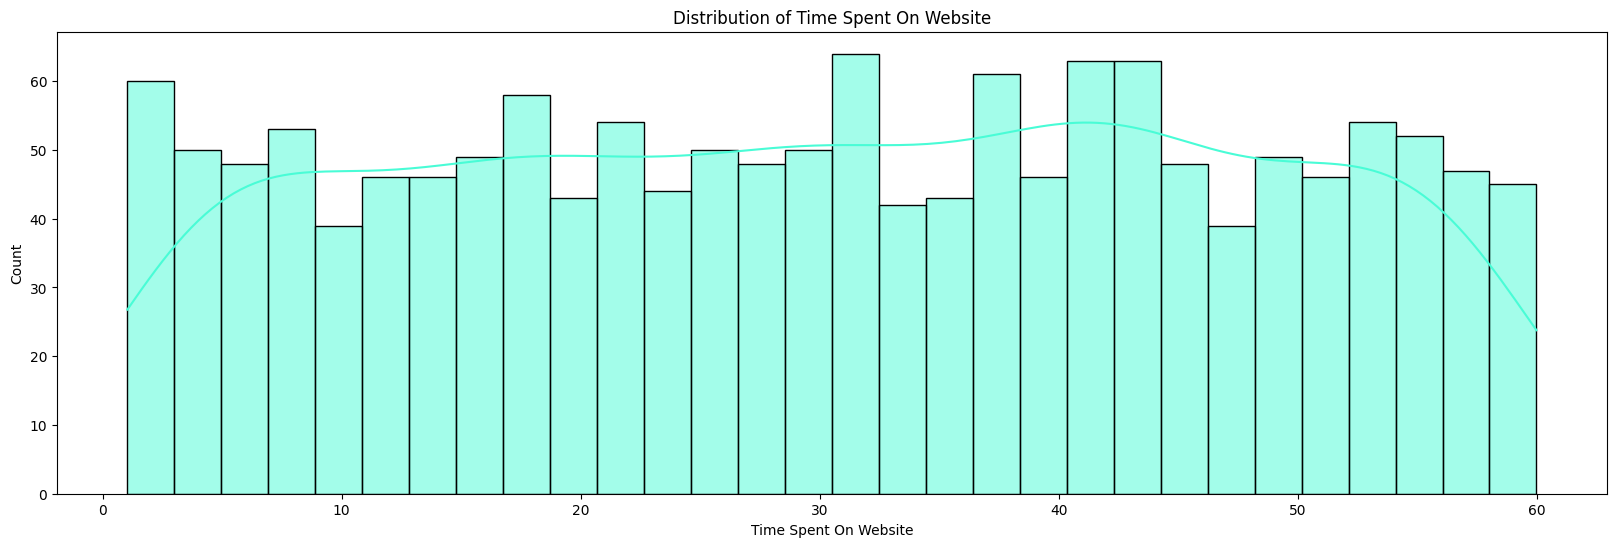

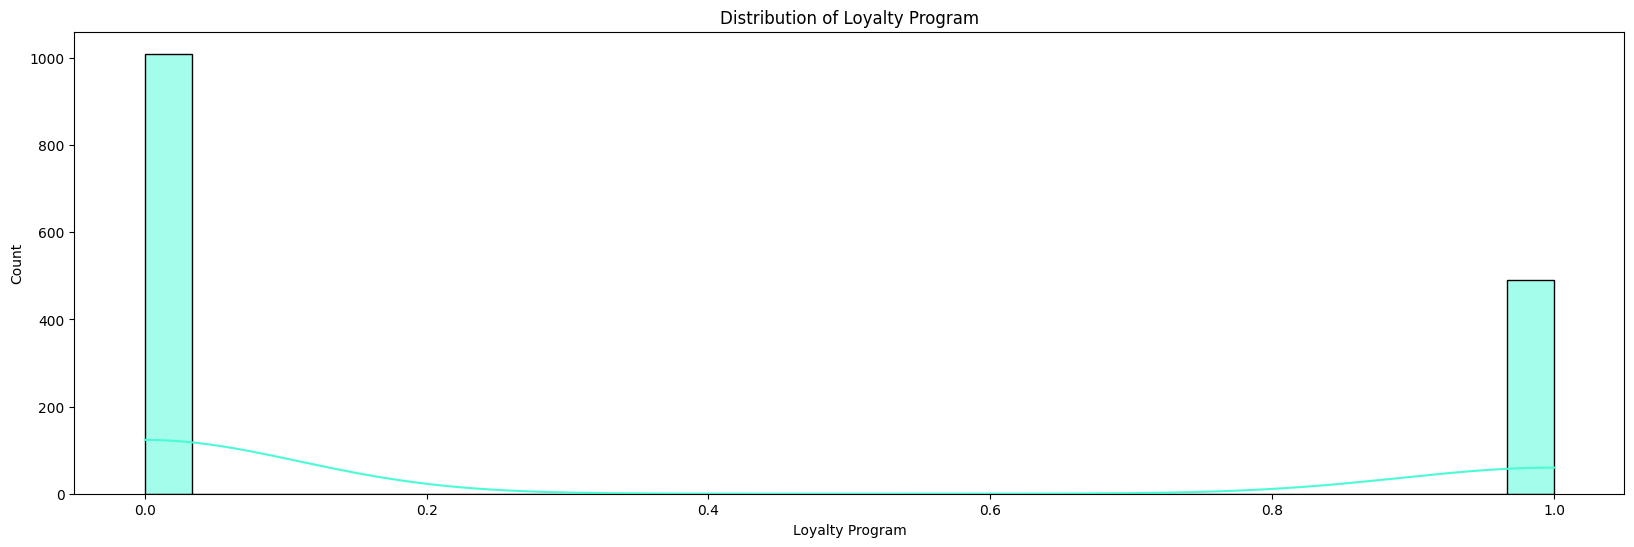

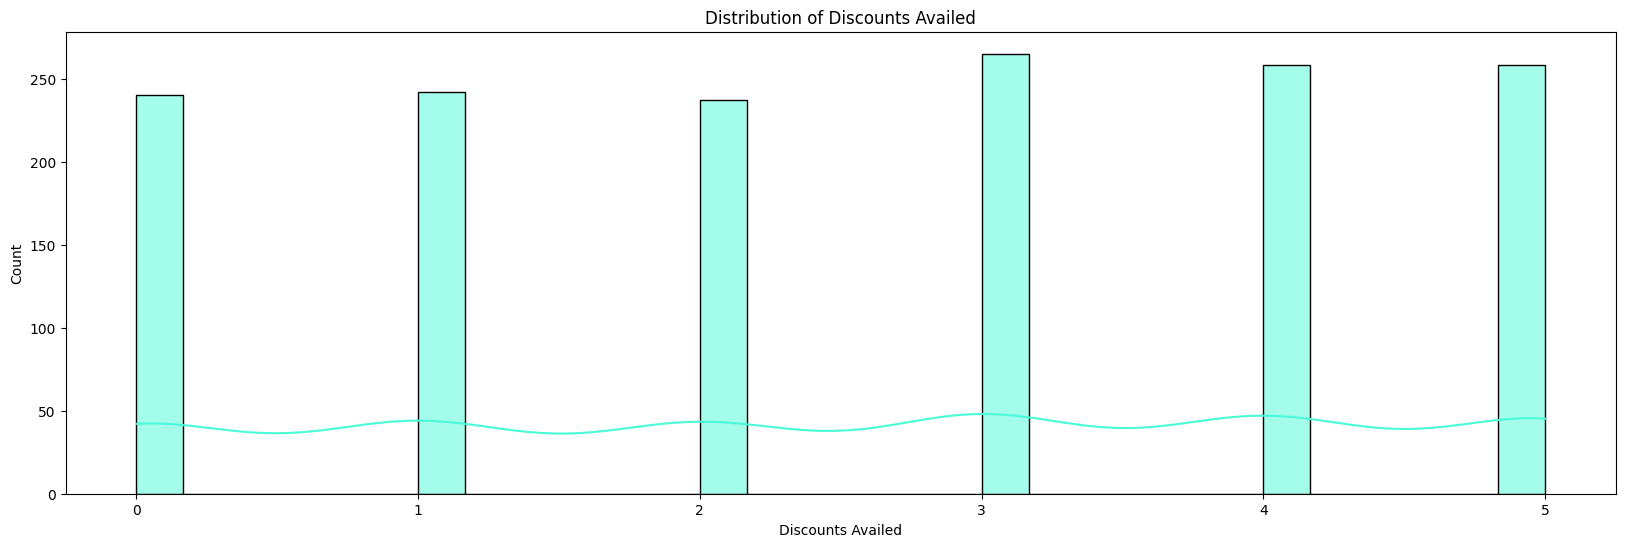

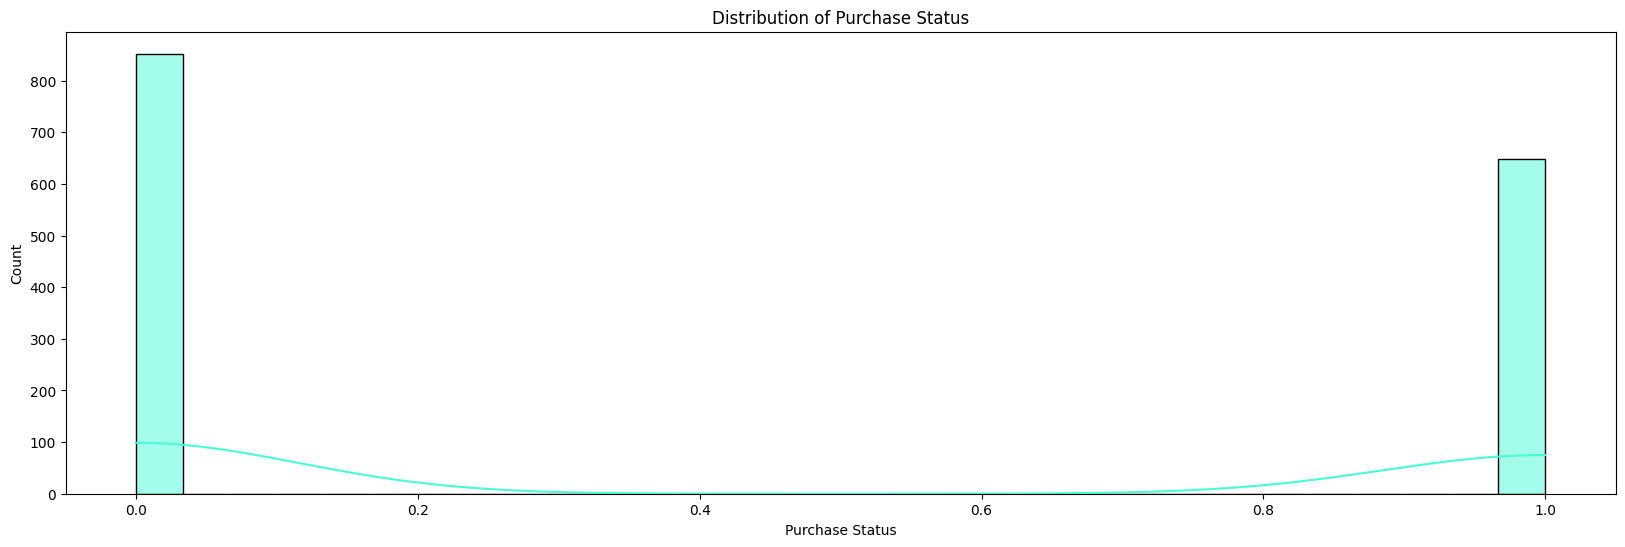

In [27]:
for column in df:
    plt.figure(figsize=(20, 6))
    sns.histplot(data=df, x=column, kde=True, bins=30, color='#49fcd6')
    plt.title(f'Distribution of {column}')
    plt.show()

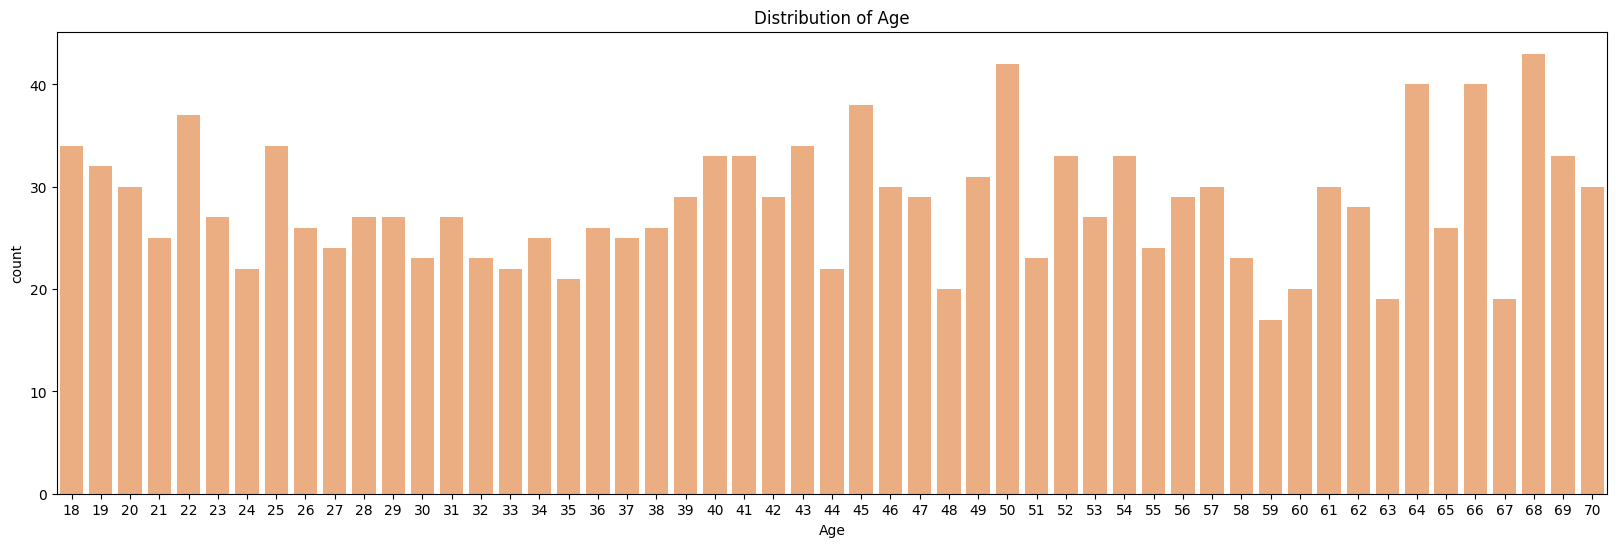

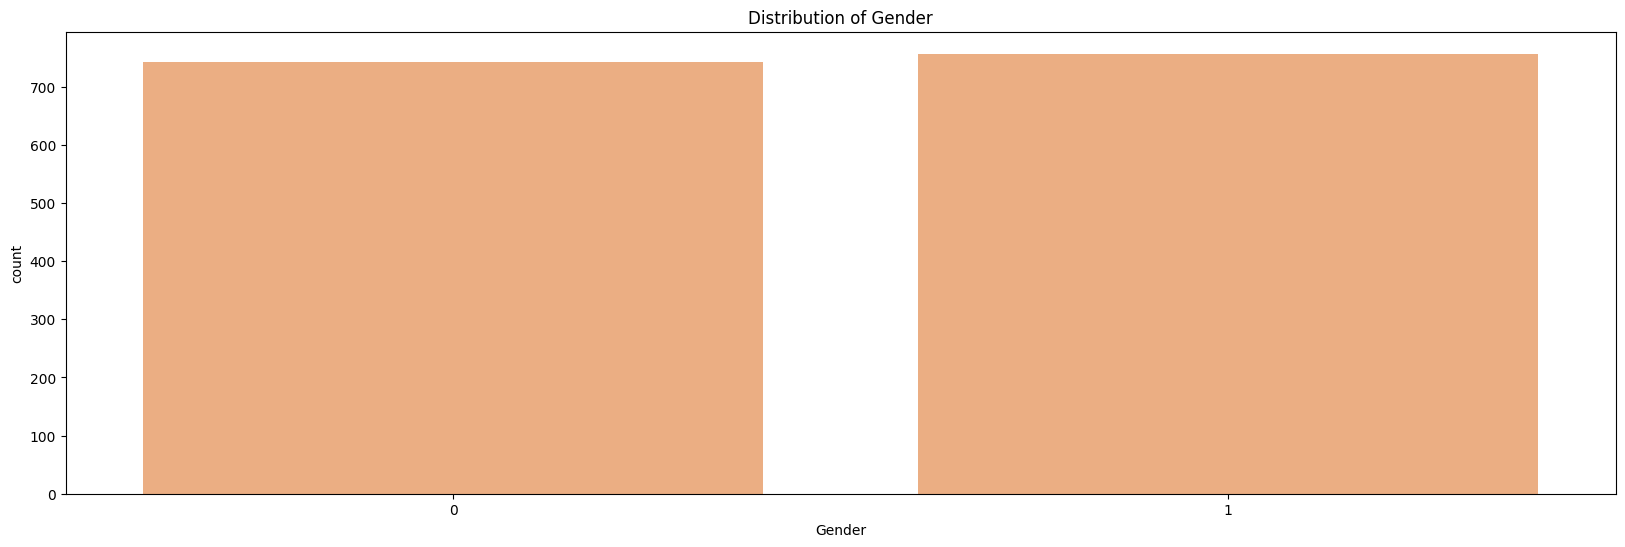

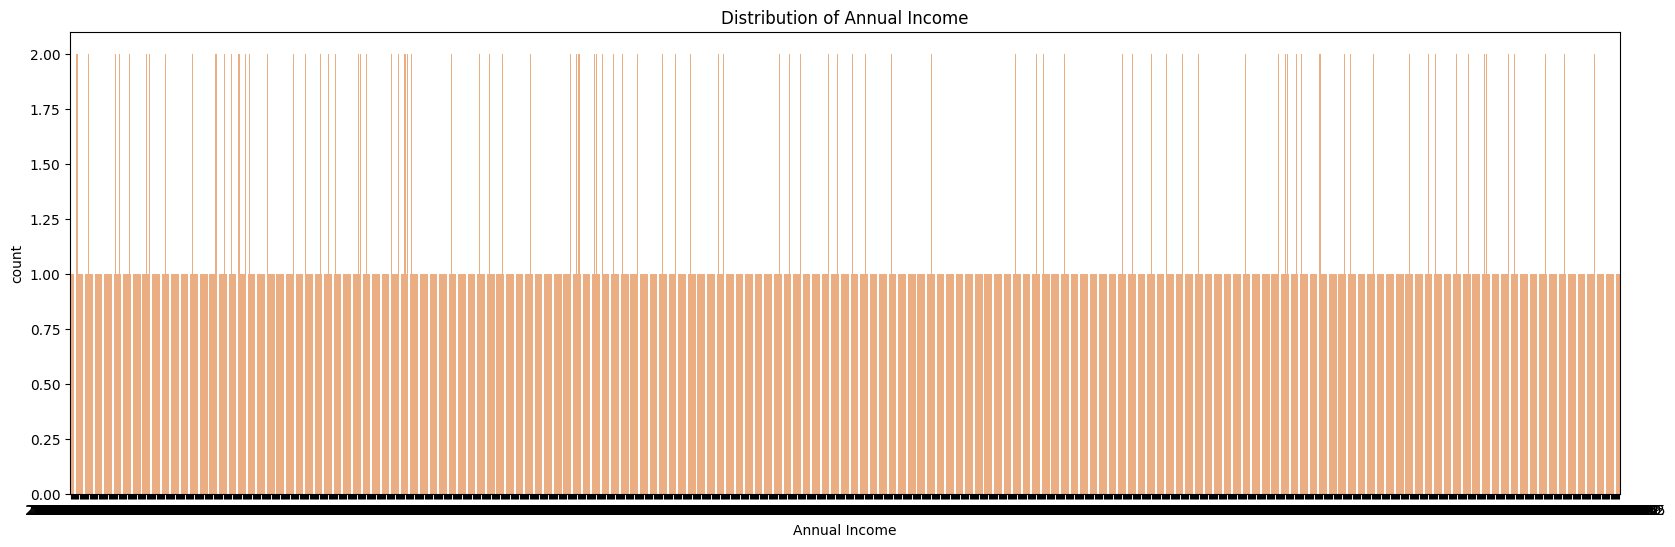

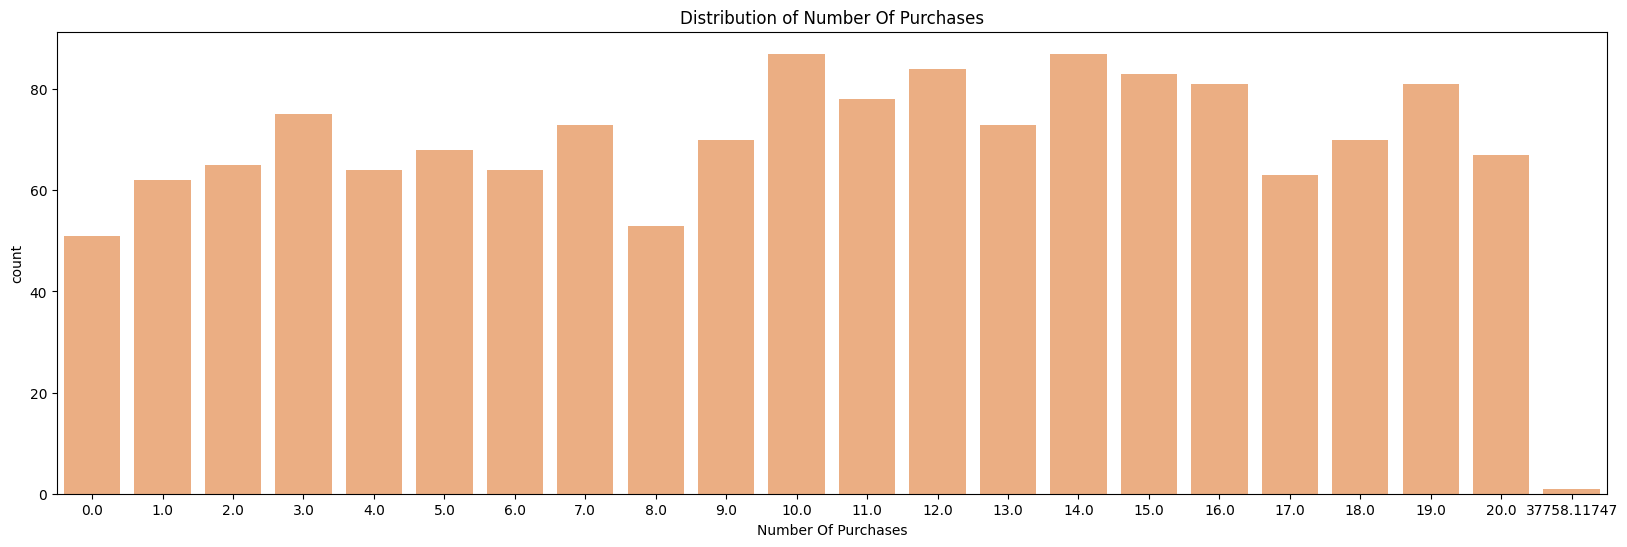

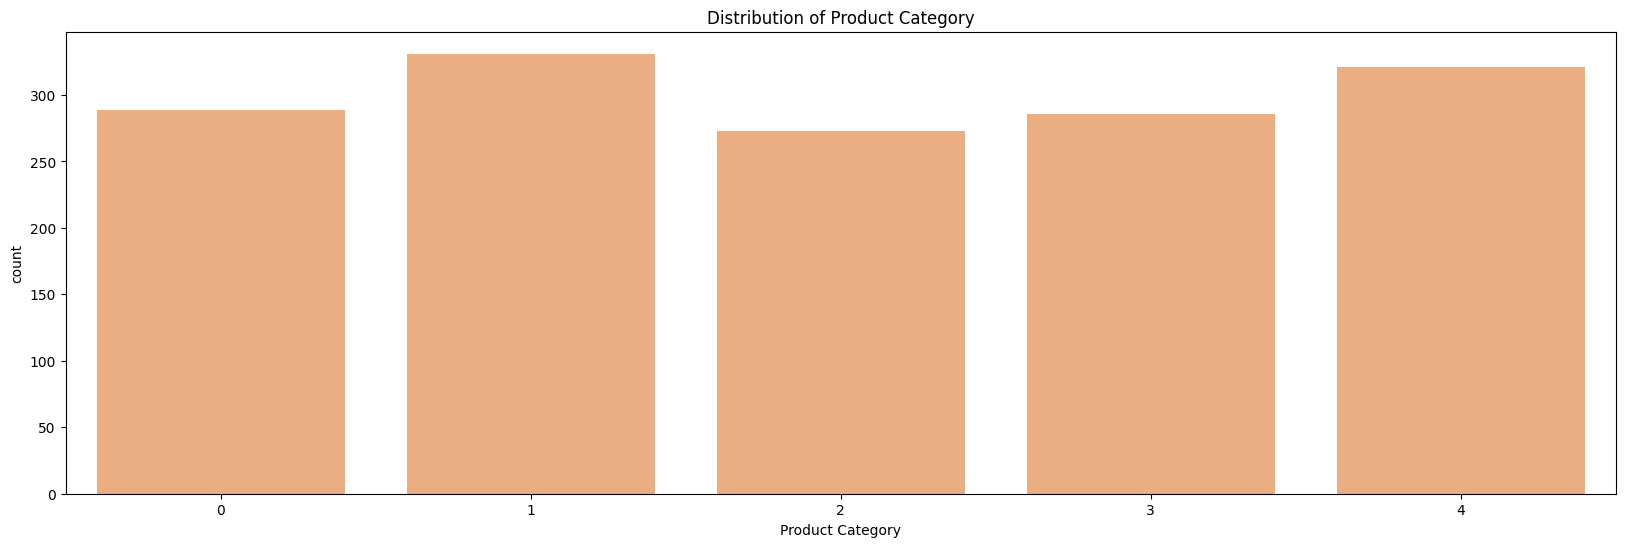

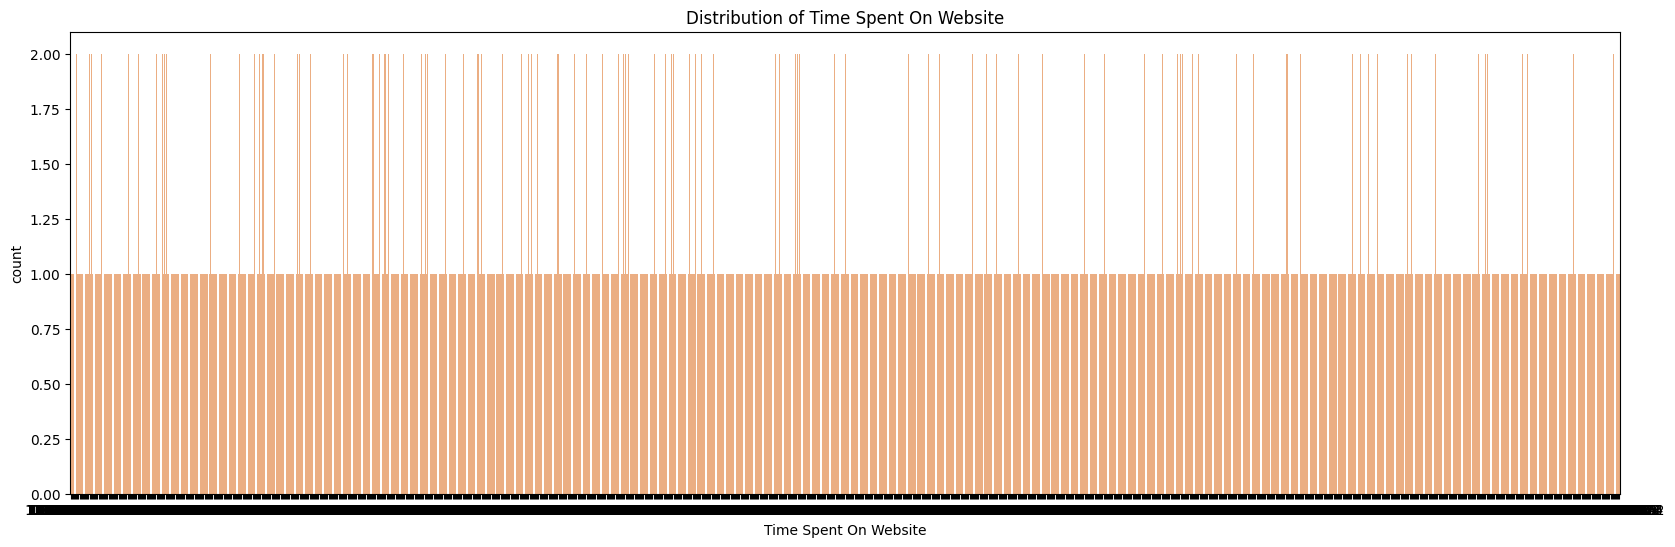

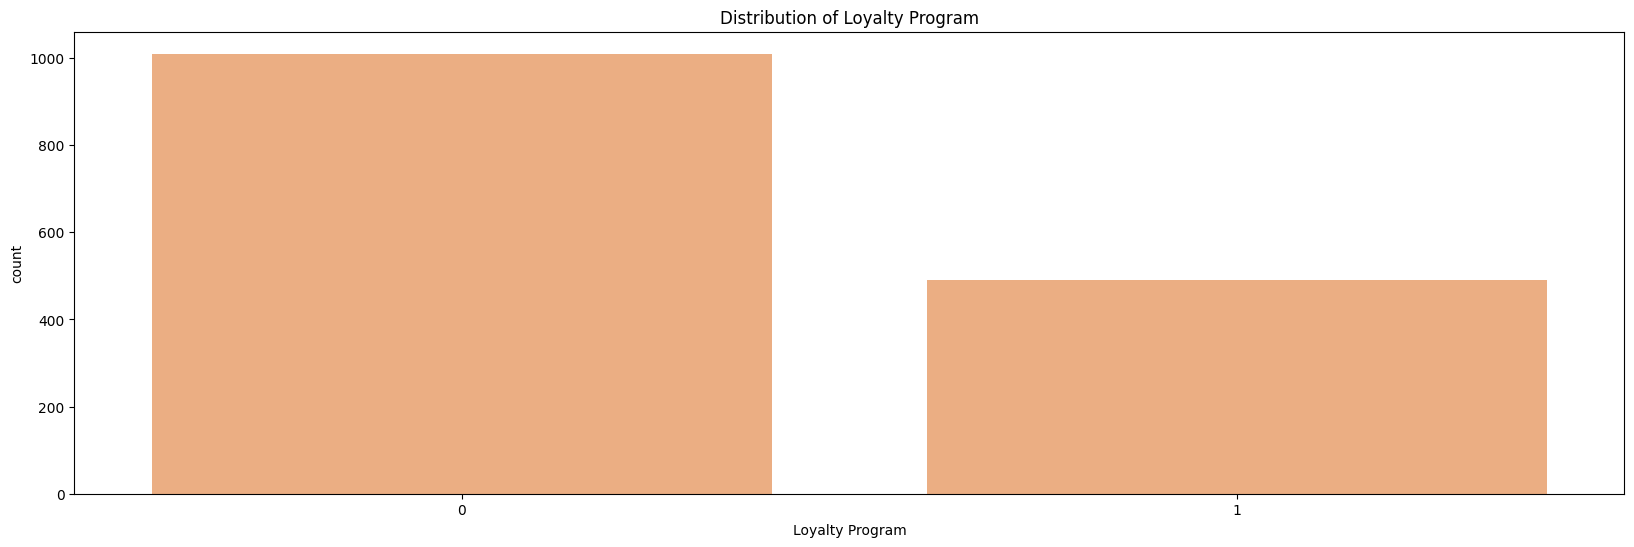

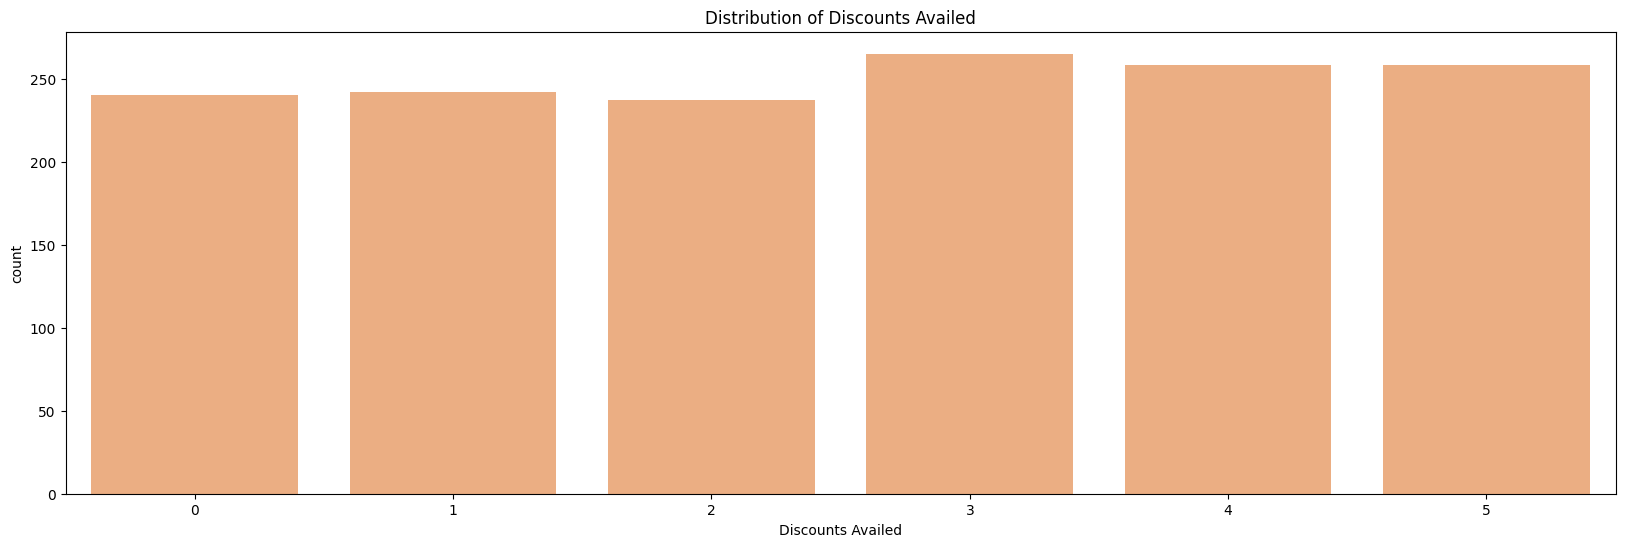

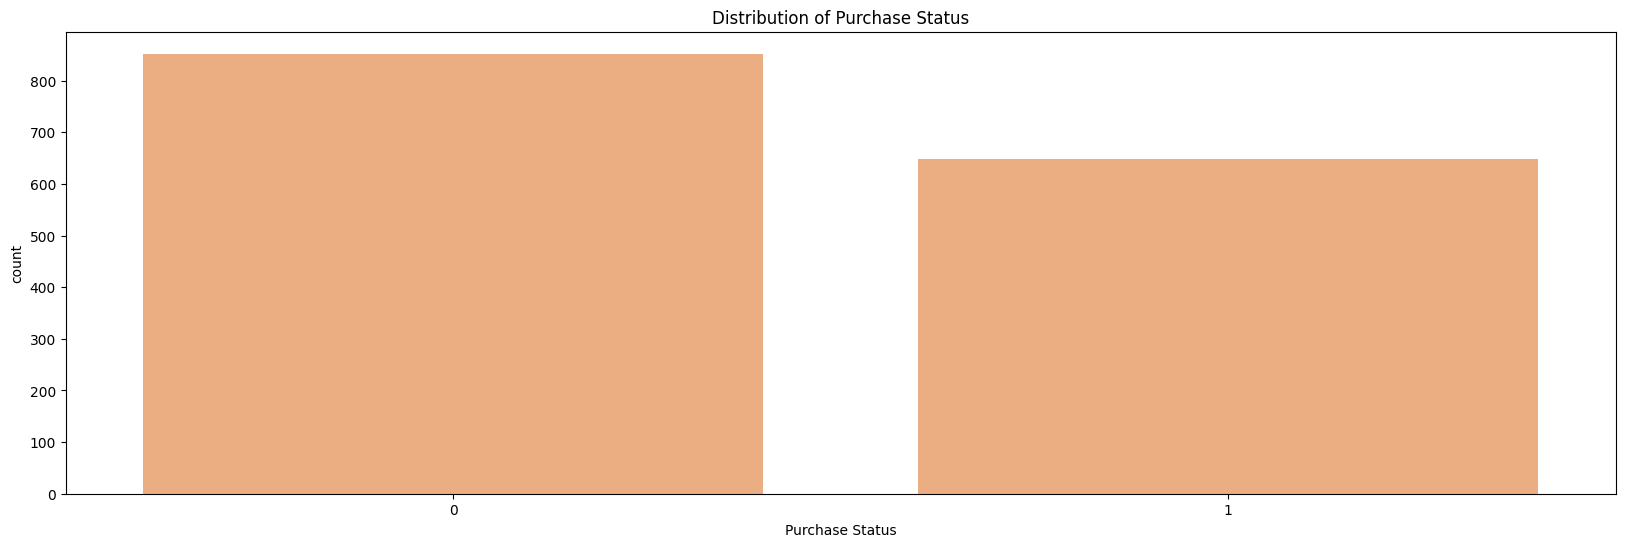

In [28]:
for column in df:
    plt.figure(figsize=(20,6))
    sns.countplot(data=df,x=column,color='#fcab72')
    plt.title(f'Distribution of {column}')
    plt.show()

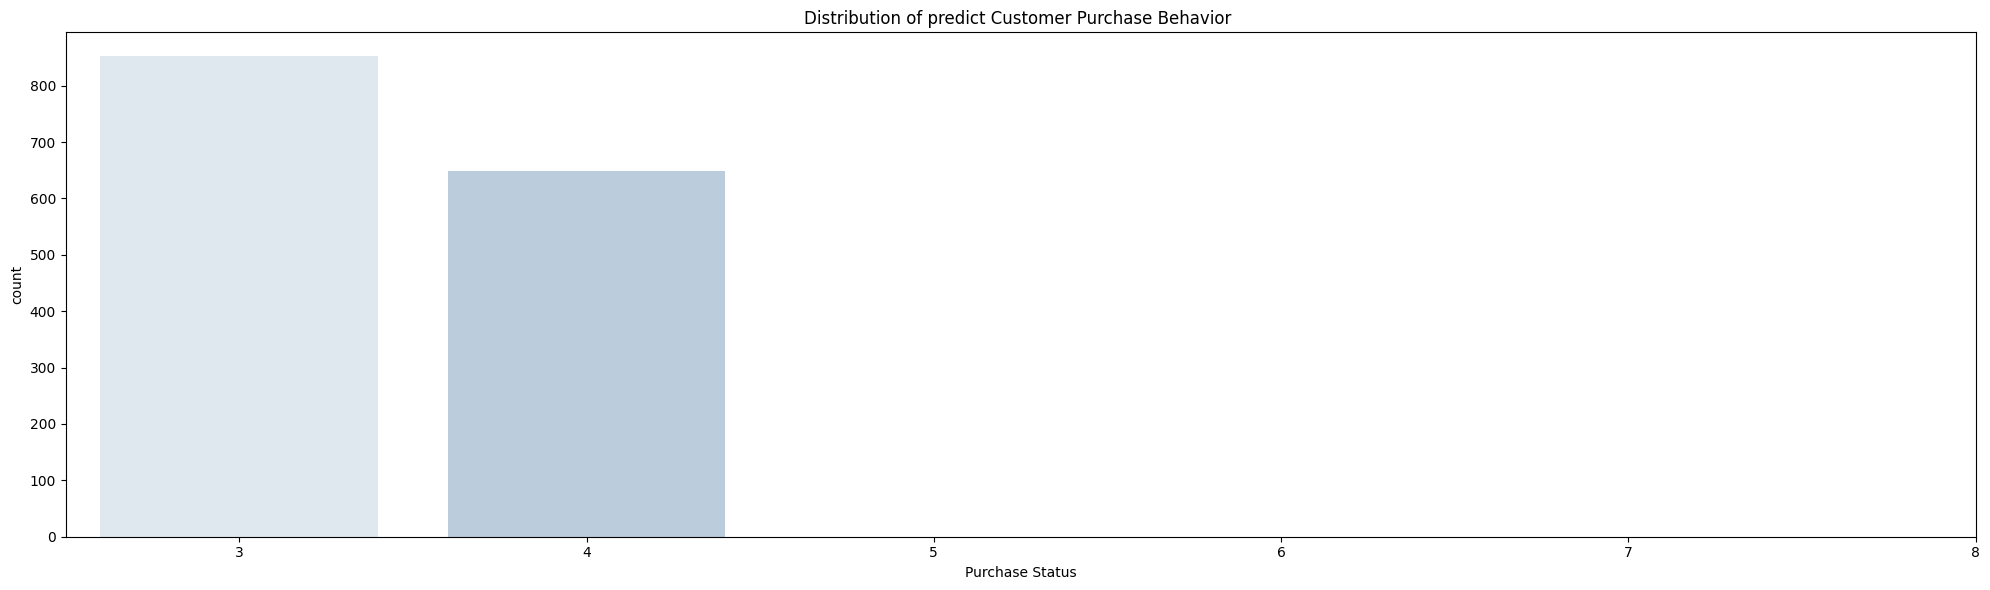

In [29]:
labels = ["3", "4", "5", "6", "7", "8"]
ticks = range(len(labels))

fig, ax = plt.subplots(figsize=(20,6))

sns.countplot(data=df, x=('Purchase Status'), ax=ax, palette=sns.color_palette("BuPu"))
ax.set_title('Distribution of predict Customer Purchase Behavior ')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.tight_layout()
plt.show()

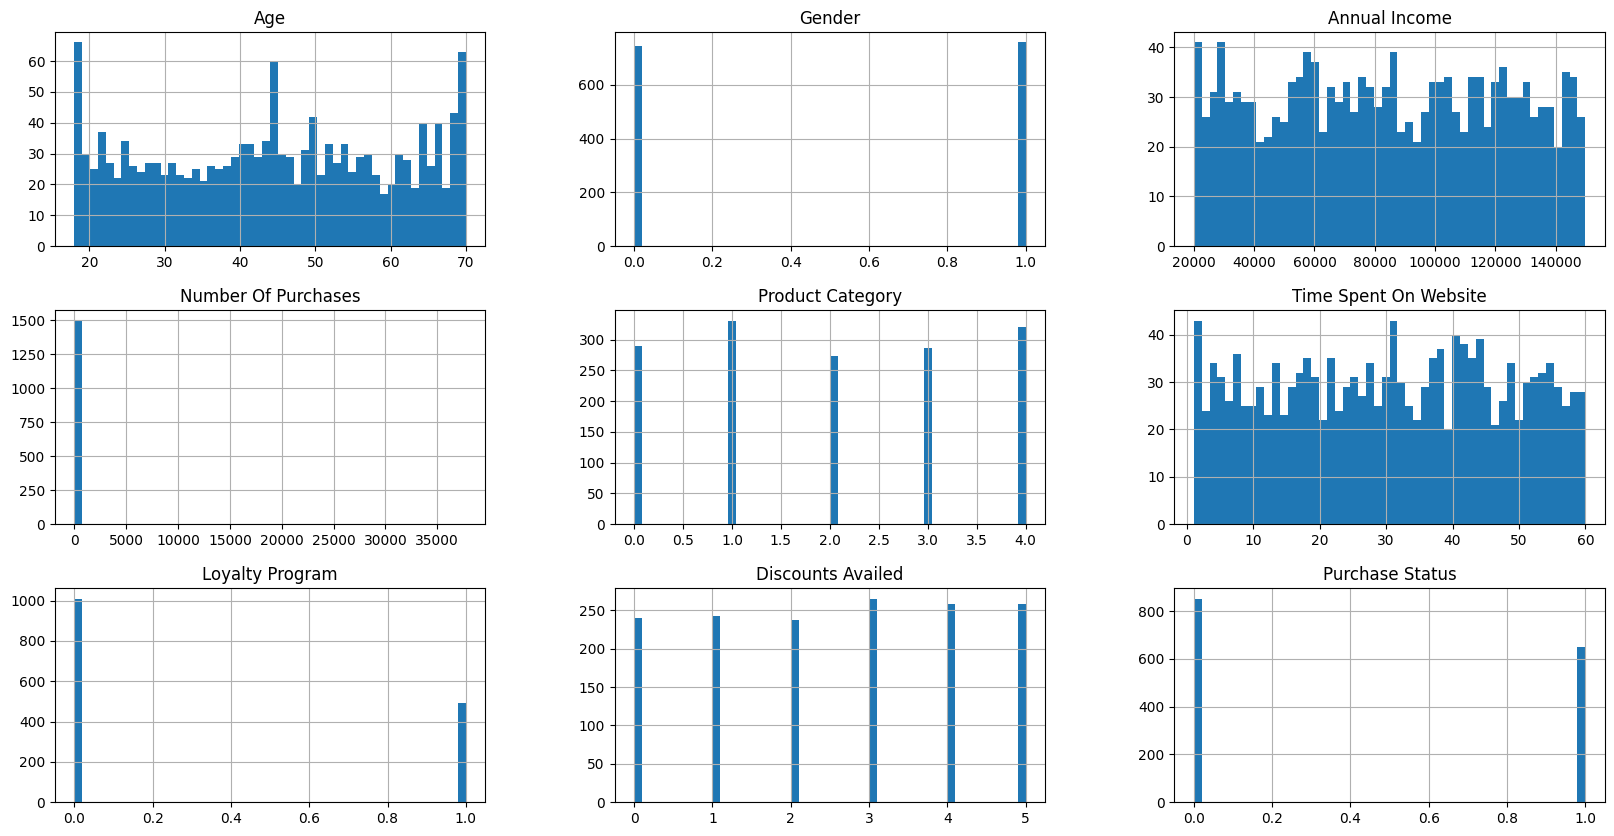

In [30]:
df.hist(figsize=(20,10),bins=50)
plt.show()

Data Preprocessing

In [31]:
x=df.iloc[:,:-1]
y=df["Purchase Status"]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
x

,Age,Gender,Annual Income,Number Of Purchases,Product Category,Time Spent On Website,Loyalty Program,Discounts Availed
0,40,1,66120.26794,8.0,0,30.568601,0,5
1,20,1,23579.77358,4.0,2,38.240097,0,5
2,27,1,127821.30640,11.0,2,31.633212,1,0
3,24,1,137798.62310,19.0,3,46.167059,0,4
4,31,1,99300.96422,19.0,1,19.823592,0,0
...,...,...,...,...,...,...,...,...
1495,39,1,65048.14183,13.0,0,34.590743,0,5
1496,67,1,28775.33107,18.0,2,17.625707,0,1
1497,40,1,57363.24754,7.0,4,12.206033,0,0
1498,63,0,134021.77550,16.0,2,37.311634,1,0


In [34]:
y

0       1
1       0
2       1
3       1
4       1
       ..
1495    1
1496    1
1497    0
1498    1
1499    1
Name: Purchase Status, Length: 1500, dtype: int64

# Separate features and labels

In [35]:
x_train.shape

(1050, 8)

In [36]:
x_train.shape[0]

1050

In [37]:
x_test.shape

(450, 8)

In [38]:
x_test.shape[0]

450

# Building Model

### Decision Tree Classifier

In [39]:
model = DecisionTreeClassifier(random_state=42)

In [40]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
y_pred = model.predict(x_test)

In [42]:
model.score(x_train,y_train)*100

100.0

In [43]:
model.predict([[40,1,66120.267939,8,0,30.568601,0,5]])

array([1], dtype=int64)

In [44]:
y_pred_dt = model.predict(x_test)

In [45]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

In [46]:
conf_matrix_dt, report_dt

(array([[230,  27],
        [ 30, 163]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.88      0.89      0.89       257\n           1       0.86      0.84      0.85       193\n\n    accuracy                           0.87       450\n   macro avg       0.87      0.87      0.87       450\nweighted avg       0.87      0.87      0.87       450\n')

# Checking Prediction for a New Customer

In [47]:
def get_customer_input():
    print("Please enter the following details for the new customer:")
    
    Age = float(input("Age: "))
    Gender = int(input("Gender (1 for Male, 0 for Female): "))
    Annual_Income = float(input("Annual Income: "))
    Number_Of_Purchases = float(input("Number Of Purchases: "))
    Product_Category = int(input("Product Category (0-3): "))
    Time_Spent_On_Website = float(input("Time Spent On Website: "))
    Loyalty_Program = int(input("Loyalty Program (1 for Yes, 0 for No): "))
    Discounts_Availed = int(input("Discounts Availed: "))
    
    customer_data = np.array([[Age, Gender, Annual_Income, Number_Of_Purchases, Product_Category, Time_Spent_On_Website, Loyalty_Program, Discounts_Availed]])
    return customer_data

In [48]:
new_customer = np.array([[30,1,120000,5,2,38,1,3]])
prediction = model.predict(new_customer)
print(f"The predicted Purchase Status for the new customer is: {'Purchase' if prediction[0] == 1 else 'No Purchase'}")

The predicted Purchase Status for the new customer is: Purchase


In [49]:
new_customer = np.array([[21,0,25000,0,3,10,0,0]])
prediction = model.predict(new_customer)
print(f"The predicted Purchase Status for the new customer is: {'Purchase' if prediction[0] == 1 else 'No Purchase'}")

The predicted Purchase Status for the new customer is: No Purchase
